## Carrie A Minerich ECommerce Ad Compaign Analysis
### This analysis is still in progress

**Begin with brief exploratory data analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\data1k\OSTK_DataAnalyst3_Test_Data_Sample.csv')
ad = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\data1\AdSpend_by_Day.csv')

In [3]:
test.head()

group       user_id  transaction_id transaction_date  transaction_value  \
0     b  2.810000e+18             NaN              NaN                0.0   
1     a  1.490000e+18             NaN              NaN                0.0   
2     a  2.720000e+18             NaN              NaN                0.0   
3     b  9.570000e+16             NaN              NaN                0.0   
4     a  2.960000e+18             NaN              NaN                0.0   

   impresssions  clicks  
0             0       0  
1             0       0  
2             0       0  
3             0       0  
4             1       0

In [4]:
test.size

7340025

In [5]:
test.shape

(1048575, 7)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
group                1048575 non-null object
user_id              1048575 non-null float64
transaction_id       12522 non-null float64
transaction_date     12468 non-null object
transaction_value    1048575 non-null float64
impresssions         1048575 non-null int64
clicks               1048575 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 48.0+ MB


In [7]:
ad.head()

Day          Cost
0  3/22/2019  10207.450140
1  3/23/2019   8295.050234
2  3/24/2019   9501.940166
3  3/25/2019  11459.440000
4  3/26/2019   9985.110304

**Question 1: What is the ad cost per day for the timeframe given**


In [8]:
ad['Day'] = ad['Day'].astype('datetime64') #change datatype from object to datetime

In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
Day     73 non-null datetime64[ns]
Cost    73 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [10]:
ad.loc[ad['Cost'].idxmax(axis=0)]

Day     2019-04-01 00:00:00
Cost                15476.5
Name: 10, dtype: object

In [11]:
print(ad['Cost'].nlargest(2))

10    15476.50968
60    14305.70967
Name: Cost, dtype: float64


In [12]:
print(ad.loc[[60]])

          Day         Cost
60 2019-05-21  14305.70967


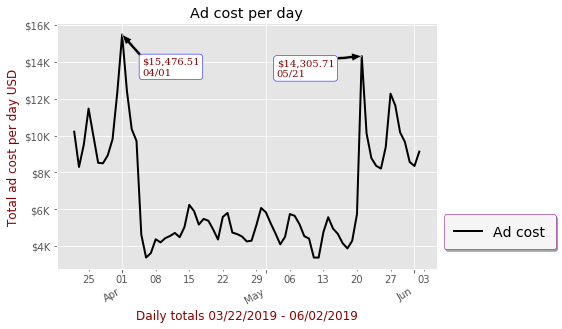

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.style

#print(matplotlib.style.available) #available plot styles
events = ad['Day']
results = ad['Cost']

fig, ax = plt.subplots() 

plt.tight_layout() #auto adjust plot layout to fit tightly into the space

#now there is an Axes instance, we can plot on top of it
ax.plot(events, results, color='black', lw=2) #axes color and line width

#style of plot
plt.style.use('ggplot')

plt.setp(ax.get_xticklabels(), rotation=30, ha='right') #rotates xaxis labels

#set xaxis ticks from datetime datatype 'Day' column
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator()) #sets x axis to weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%b')) # month abbreviation

#change currency to $xxK format
def currency(y, pos):
    'The two args are the value and tick position'
    if y >= 1000:
        return '${:1.0f}K'.format(y*1e-3)
    
formatter= FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)

#arrow properties for annotated peaks
arrow_properties = dict(
    facecolor="black", width=3,
    headwidth=8, headlength=10)

#add peak values
plt.annotate('$15,476.51\n04/01', 
             xy=(events[10], results[10]), 
             xycoords=('data'), 
             xytext=(+20, -40),
             textcoords='offset points',
             fontsize=10,
             color='darkred',
             family='serif',
             bbox=dict(boxstyle="round", fc="white", ec="blue"),
             arrowprops = 
                 arrow_properties,
                 horizontalalignment='left') 
                 
plt.annotate('$14,305.71\n05/21', 
             xy=(events[60], results[60]), 
             xycoords=('data'),
             xytext=(-85, -20),
             textcoords='offset points',
             fontsize=10,
             color='darkred',
             family='serif',
             bbox=dict(boxstyle="round", fc="white", ec="blue"),
             arrowprops = 
                 arrow_properties,
                 horizontalalignment='left') 

#axis labels and legend
ax.set_title('Ad cost per day')
plt.xlabel('Daily totals 03/22/2019 - 06/02/2019', color='darkred')
plt.ylabel("Total ad cost per day USD",  color='darkred')
leg = plt.legend(['Ad cost'], 
                 bbox_to_anchor=(1, 0.25), 
                 loc='upper left', 
                 frameon=True, 
                 #borderaxespad=1, 
                 edgecolor ='darkmagenta', 
                 fancybox=True, 
                 framealpha=1, #transparency
                 facecolor='whitesmoke', 
                 shadow=True, 
                 borderpad=0.75, #border from font to edge 
                 fontsize=14)

plt.show()

**Question 2: What is the difference between the test and control group of ad cost per day and transaction value difference between the two groups (control and test group)**

In [15]:
df = test.drop(columns = ['user_id', 'transaction_id', 'impresssions', 'clicks'], axis=1)

In [16]:
df.head()

group transaction_date  transaction_value
0     b              NaN                0.0
1     a              NaN                0.0
2     a              NaN                0.0
3     b              NaN                0.0
4     a              NaN                0.0

In [17]:
#Group A (test group with Ads)
dfa = df.loc[df['group'] == 'a'].rename(columns={'transaction_value':'Group A Value'}).dropna().groupby('transaction_date').sum()

In [18]:
dfa.head()

Group A Value
transaction_date               
04/19/19               51733.43
04/20/19               43313.90
04/21/19               36567.23
04/22/19               47451.13
04/23/19               63088.70

In [19]:
dfb = df.loc[df['group'] == 'b'].rename(columns={'transaction_value':'Group B Value'}).dropna().groupby('transaction_date').sum().reset_index()

In [20]:
dfb.head()

transaction_date  Group B Value
0         04/19/19       47847.56
1         04/20/19       35542.95
2         04/21/19       36662.06
3         04/22/19       43052.34
4         04/23/19       40568.61

In [21]:
#merge both DF and graph
df1 = pd.merge(dfa, dfb, how='outer', on=['transaction_date'])

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 3 columns):
transaction_date    29 non-null object
Group A Value       29 non-null float64
Group B Value       29 non-null float64
dtypes: float64(2), object(1)
memory usage: 812.0+ bytes


In [23]:
#I'll need to change transaction_date object to datetime for final visual
df1.head()

transaction_date  Group A Value  Group B Value
0         04/19/19       51733.43       47847.56
1         04/20/19       43313.90       35542.95
2         04/21/19       36567.23       36662.06
3         04/22/19       47451.13       43052.34
4         04/23/19       63088.70       40568.61

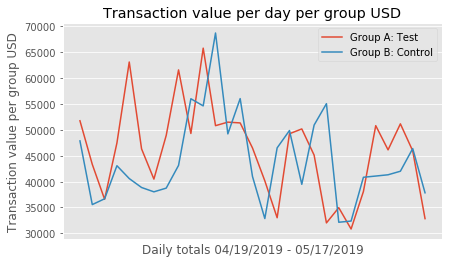

In [39]:
#This visual and associated analysis is not yet complete but this quick visual helps to see trends
#I will correct the graph to represent cleaner date ticks 

events = df1['transaction_date']
a = df1['Group A Value']
b = df1['Group B Value']

fig, ax = plt.subplots()
plt.tight_layout()

plt.plot(events, a, b)

#For the dateformatting to work, I need to modify the datatype of transaction date
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator()) #sets x axis to weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%b')) # month abbreviation
fig.autofmt_xdate() #i need to change date datetype to be able to graph


ax.set_title('Transaction value per day per group USD')
plt.xlabel('Daily totals 04/19/2019 - 05/17/2019')
plt.ylabel('Transaction value per group USD')
plt.legend(['Group A: Test', 'Group B: Control'], loc=1)
plt.show()

**The A/B visualization is not yet complete however you see my thought process. I need additional information from the client on how ad campaign success was predetermined to be measured to determine how to best interpret the analysis and also to identiy additional analysis to conduct.**

**Still cleaning data to create visuals and polished dashboard deliverable. I first choose transaction value to look at the revenue generated between the two groups. I will then circle back to ad cost per day and shorten the ad cost dataframe to match the test dataframe. I would look at the ad cost per day vs. the revenue generated per day. I would continue analysis to look at impressions and click rates over the time frame with ad cost and revenue generated per day.**